In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [117]:
cancer = pd.read_csv('data.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [118]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Let's check if the cancer is Malignant or Benign**

# Data Cleaning

*Drop Columns*

In [119]:
cancer.drop(columns=['id', 'Unnamed: 32'], inplace = True)

*Missing Value*

In [120]:
cancer.isna().sum()/len(cancer.index)*100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

# Final Dataset

In [121]:
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# PreProcessing

### *Define Target Data*
* If the cancer is Benign, it will be 0
* If the cancer is Malignant, it will be 1

In [122]:
cancer['diagnosis'] = np.where(cancer['diagnosis'] == 'M', 1, 0)
cancer['diagnosis'].value_counts()/cancer.shape[0]*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

* Data is imbalanced.

In [123]:
X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

In [160]:
robust = RobustScaler()
X_scaled = robust.fit_transform(X)

pandas.core.frame.DataFrame

* In the case of breast cancer, We want to reduce predictions to people who are misdiagnosed, diagnosed as benign, but it turns out to be malignant, that is, the person we predict is not the default (FN). Evaluation metrics used: **Recall**

### *Data Splitting*

In [125]:
X.shape

(569, 30)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 3030)

* We use 0.3 as default score for test_size and X.shape for random_state so the data will be divided equally.

# Modeling

**KNeighbors Classifier**

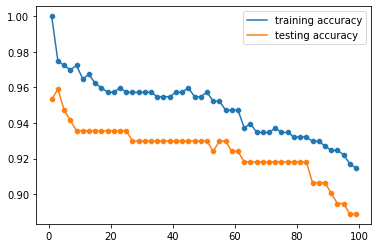

In [127]:
k = range(1,100,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    y_predict_train = knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

sns.lineplot(k, training_accuracy)
sns.scatterplot(k, training_accuracy)
sns.lineplot(k, testing_accuracy)
sns.scatterplot(k, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [128]:
print('This is the best K for KNeighbors Classifier: ', best_k, '\nAccuracy score is: ', score)

This is the best K for KNeighbors Classifier:  3 
Accuracy score is:  0.9590643274853801


* This model indicates **underfitting** because training accuracy and testing accuracy are both decreases.

**Decision Tree Classifier**

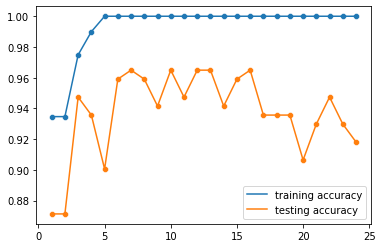

In [129]:
depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
        
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [130]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)

This is the best depth for Decision Tree Classifier:  7 
Accuracy score is:  0.9649122807017544


* This model indicates **overfitting** because training accuracy is good and the testing accuracy is decreased.

**Random Forest Classifier**

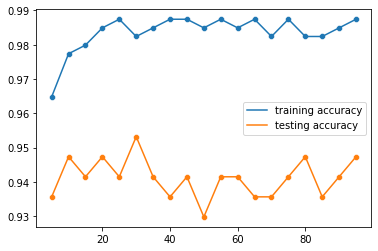

In [131]:
estimator = range(5,100,5)
training_accuracy = []
testing_accuracy = []
score = 0
for i in estimator:
    forest = RandomForestClassifier(n_estimators = i, max_depth = 3)
    forest.fit(X_train, y_train)
    
    y_predict_train = forest.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = forest.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_estimator = i
        
sns.lineplot(estimator, training_accuracy)
sns.scatterplot(estimator, training_accuracy)
sns.lineplot(estimator, testing_accuracy)
sns.scatterplot(estimator, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])       

In [132]:
print('This is the best Tree Count for Random Forest Classifier: ', best_estimator, '\nAccuracy score is: ', score)

This is the best Tree Count for Random Forest Classifier:  30 
Accuracy score is:  0.9532163742690059


### *Define Model*

* We use **KNeighbors Classifier** with best K score and **Decision Tree Classifier** with best depth score.

In [133]:
knn = KNeighborsClassifier(n_neighbors = 3)
tree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)
forest = RandomForestClassifier(max_depth = 3, n_estimators= best_estimator)

In [134]:
def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

knn_cv = model_evaluation(knn, 'recall')
tree_cv = model_evaluation(tree, 'recall')
forest_cv = model_evaluation(forest, 'recall')

for model in [knn, tree, forest]:
    model.fit(X_train, y_train)

score_cv = [knn_cv.round(5), tree_cv.round(5), forest_cv.round(5)]
score_mean = [knn_cv.mean(), tree_cv.mean(), forest_cv.mean()]
score_std = [knn_cv.std(), tree_cv.std(),forest_cv.std()]
score_recall_score = [recall_score(y_test, knn.predict(X_test)), 
            recall_score(y_test, tree.predict(X_test)),
                     recall_score(y_test, forest.predict(X_test))]
method_name = [ 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,cv score,mean score,std score,recall score
0,KNN Classifier,"[0.83333, 0.93333, 0.96667, 0.93103, 0.86207]",0.905287,0.049522,0.890625
1,Decision Tree Classifier,"[0.9, 0.93333, 0.73333, 0.93103, 0.86207]",0.871954,0.073970,0.921875
2,Random Forest Classifier,"[0.9, 0.93333, 1.0, 0.93103, 0.82759]",0.918391,0.055905,0.843750


* From the cross validation and model evaluation processes, we decide to continue with **Decision Tree Classifier** even the score is indicated overfitting. Let's tune the model.

# HyperParam Tuning

In [135]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)

hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [3, 9, 13, 15, 17],
    'class_weight': ['list', 'dict', 'balanced'],
    'random_state': [3030]
}

grid = GridSearchCV(
                tree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid.fit(X_train, y_train)

print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9519540229885057
best param {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 15, 'random_state': 3030, 'splitter': 'best'}


# Comparison Between Before & After Tuning

In [136]:
tree.fit(X_train, y_train)
tree_recall = (recall_score(y_test, tree.predict(X_test)))

grid.best_estimator_.fit(X_train, y_train)
grid_recall = (recall_score(y_test, grid.predict(X_test)))

score_list = [tree_recall, grid_recall]
method_name = ['Decision Tree Classifier Before Tuning', 'Decision Tree Classifier After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Decision Tree Classifier Before Tuning,0.921875
1,Decision Tree Classifier After Tuning,0.937500


* This is the comparison between before tuning score and after tuning score using Decision Tree Classifier. **We choose to use Decision Tree Classifier after tuning** score in this section.

# Decision Tree Classifier Plot

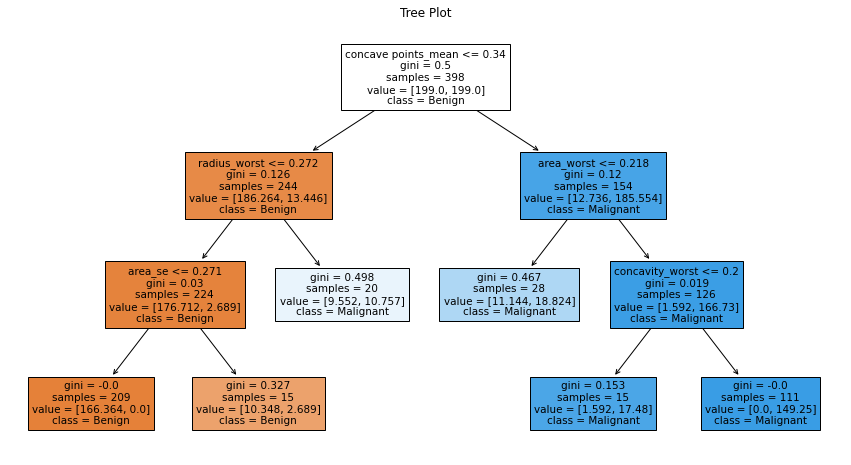

In [137]:
plt.figure(figsize=(15,8))
plot_tree(grid.best_estimator_, feature_names = list(X), class_names = ['Benign','Malignant'], filled = True)
plt.title('Tree Plot')
plt.show()

# Feature Importance

In [138]:
importance_table = pd.DataFrame({
    'imp': grid.best_estimator_.feature_importances_
}, index = X.columns)
importance_table.sort_values('imp', ascending = False)

,imp
concave points_mean,0.894979
radius_worst,0.057634
area_worst,0.039847
area_se,0.006135
concavity_worst,0.001405
radius_mean,0.000000
concavity_se,0.000000
symmetry_worst,0.000000
concave points_worst,0.000000
compactness_worst,0.000000


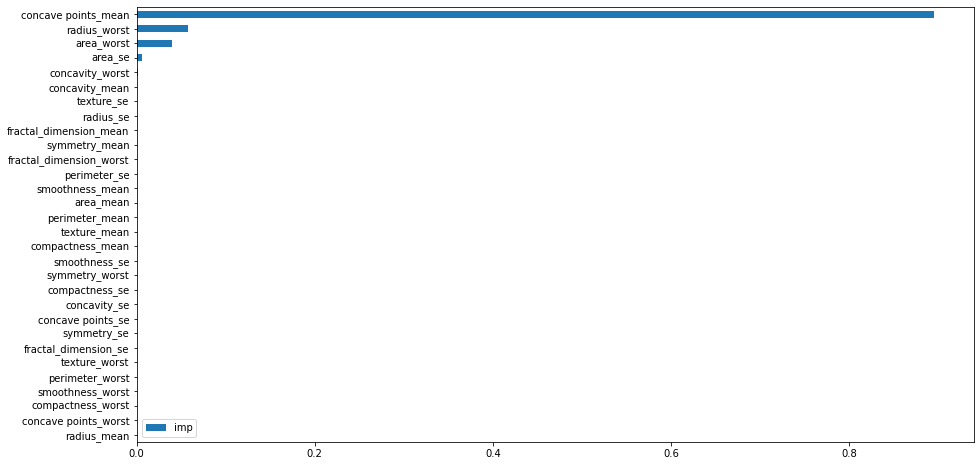

In [139]:
importance_table.sort_values('imp', ascending = True).plot(kind = 'barh', figsize = (15,8))

* The results suggest perhaps 4 of the 30 features as being important to prediction.

# Deploying the Final Tree Model for Produciton

In [184]:
X = cancer[['concave points_mean','radius_worst', 'area_worst', 'area_se']]
y = cancer['diagnosis']

In [185]:
robust = RobustScaler()
X_scaled = robust.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 3030)

In [186]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=3030),
             n_jobs=-1,
             param_grid={'class_weight': ['list', 'dict', 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 9, 13, 15, 17],
                         'random_state': [3030],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [187]:
def predict(concave_points_mean,radius_worst, area_worst, area_se):
  scaled = robust.transform([[concave_points_mean,radius_worst, area_worst, area_se]])
  print(scaled)
  result = grid.predict(scaled)
  print(result)
  if(result[0]==0):
    return "The Tumor is Benign (noncancerous)."
  else: 
    return "The Tumor is Malignant (cancerous)."


In [144]:
!pip install -q gradio

In [188]:
import gradio as gr

iface = gr.Interface(
  fn=predict, 
  inputs=["number", "number", "number", "number"],
  outputs=["text"])
iface.launch()

# SAMPLE TEST VALUES:
# 0.09498 	27.32 	2398.0   112.40 -> Malignant
# 0.10520 	14.91 	567.7	  27.23 -> Benign

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15043.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7ff464ee5050>,
 'http://127.0.0.1:7868/',
 'https://15043.gradio.app')

# Summary

- In the first step, we did **scaling at X data using Robust Scaler** because we believe there are so many outliers.
- We only used **KNeighbor Classifier (KNN),the Decision Tree Classifier (Tree) and Random Forest Classifier (Forest)** in this prediction. We try to find the best K score, best depth and best estimator for each model and see how the training and testing data perform on the models.
- From the cross-validation process, the KNN model has the highest score with 0.9 but after model evaluation using recall metric, the **Tree model has the highest score with 0.92**. Even the Tree model **indicated overfitting**, we still choose to use this score to continue the process.
- We decide to get the best parameter for the Tree model by Tuning with the best score of 0.95 which is increasing, then compare the Tree model score before and after tuning. The comparison results prove that the **Tree model after the Tuning process is higher than before with 0.9375**.
- We checked again to see the data using the Feature Importance process. Surprisingly, from 30 features (columns), **only 4 features that is important** to prediction.
- We Trained the final Tree model with the **Top 4 important features** and **Deployed the model** for production on the internet.